In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import data

In [3]:
df = pd.read_csv(r'D:\Documents\PASTIME\CODING\Python\freecodecamp\data analysis\medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add 'overweight' column

In [4]:
w_mask = df['weight'] / ((df['height'] / 100) ** 2) > 25
df.loc[w_mask, 'overweight'] = 1
df.loc[~w_mask, 'overweight'] = 0
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0


Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [5]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0


### Draw Categorical Plot
Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

   cardio     variable  value  total
0       0       active    0.0   6378
1       0       active    1.0  28643
2       0         alco    0.0  33080
3       0         alco    1.0   1941
4       0  cholesterol    0.0  29330


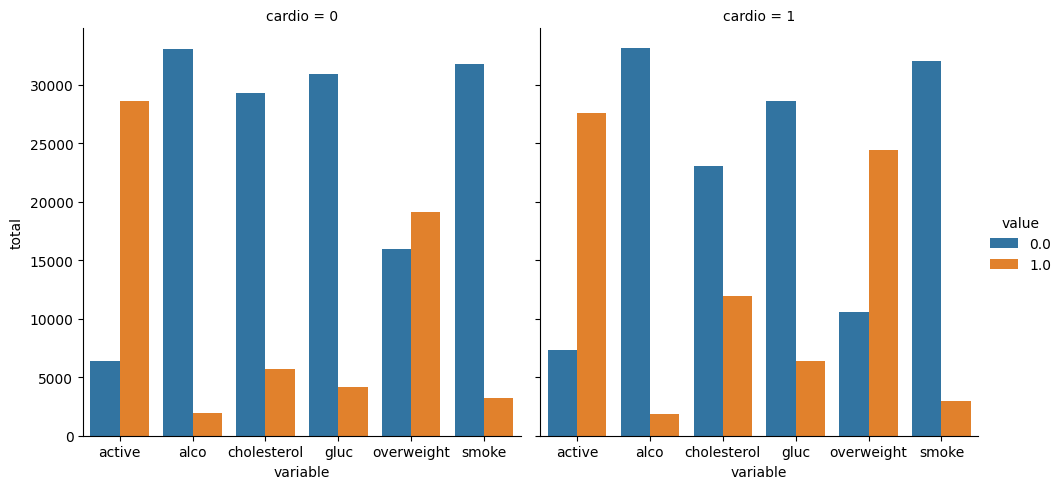

In [8]:
def draw_cat_plot():
    necessary_list = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars = necessary_list)
    df_cat = df_cat.reset_index().groupby(['cardio', 'variable', 'value']).size().reset_index().rename(columns={0:'total'})
    print(df_cat.head())
    fig = sns.catplot(x = 'variable', y = 'total', data = df_cat, col = 'cardio', kind = 'bar', hue = 'value')
    return fig

print(draw_cat_plot())


Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly

Draw the catplot with ```sns.catplot()```

Get the figure for the output

Draw Heat Map

Figure(1800x900)


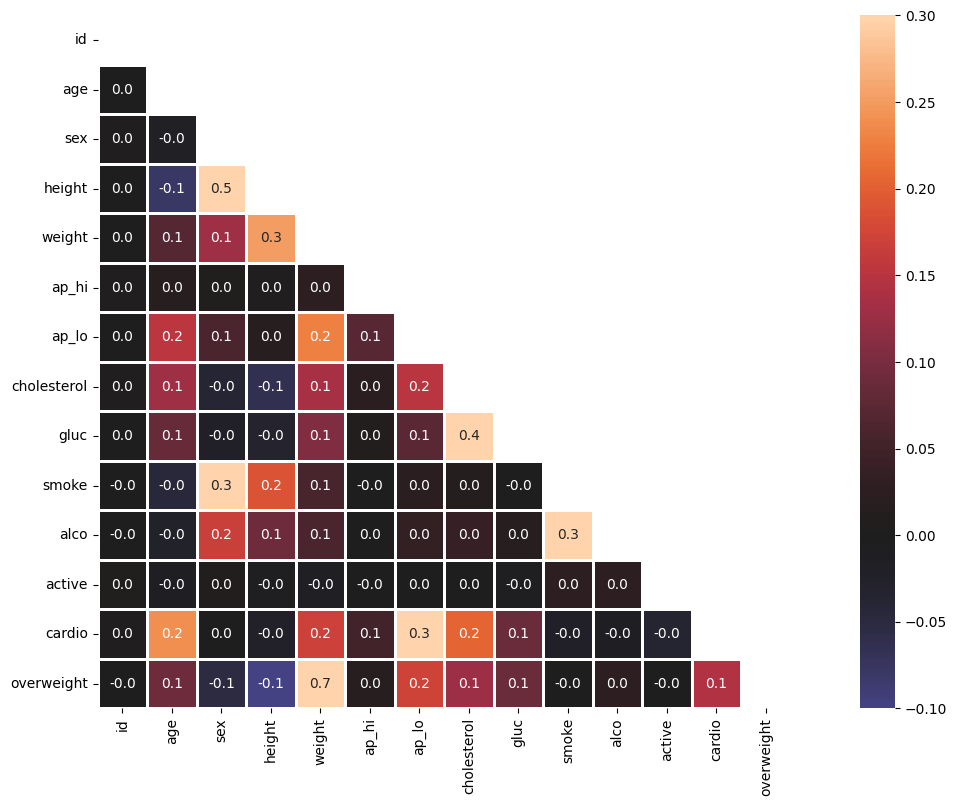

In [7]:
def draw_heat_map():
    pr_mask = (df['ap_lo'] <= df['ap_hi'])
    lo_h_mask = (df['height'] >= df['height'].quantile(0.025))
    hi_h_mask = (df['height'] <= df['height'].quantile(0.975))
    lo_w_mask = (df['weight'] >= df['weight'].quantile(0.025))
    hi_w_mask = (df['weight'] <= df['weight'].quantile(0.975))
    df_heat = df.loc[pr_mask & lo_h_mask & hi_h_mask & lo_w_mask & hi_w_mask]
    corr = df_heat.corr()
    mask = np.triu(corr)
    fig, ax = plt.subplots(figsize=(18, 9))
    sns.heatmap(corr, ax = ax, annot = True, fmt = '.1f' ,  mask = mask, center = 0, square = True, linecolor = 'w', linewidth = 1, vmin = -0.1, vmax = 0.3)
    return fig

print(draw_heat_map())
